<a href="https://colab.research.google.com/github/OshidiWeerakulasuriya/User-interest-and-hotel-feature-identification-model/blob/main/TweetsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code reference - https://github.com/Opshou/twitterCluster/blob/master/Twitter%20clustering.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import re                                                       # regular expressions
import nltk                                                     # nlp library
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
import itertools                                                # corpus creation
import collections                                              # word counter
import networkx  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from string import punctuation # a string of various punctuation marks

**check by removing these**

In [ ]:
# the data science triple threat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to construct the custom tokenizer
from string import punctuation # a string of various punctuation marks
import nltk # for stopwords and the WordNet lemmatizer
nltk.download('stopwords') # need internet connection

# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# to pickle the final list of stopwords
import pickle

# for creating word clouds
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# for scaling data
from sklearn.preprocessing import MaxAbsScaler

# latent variable learning methods - PCA & LDA topic modelling
from sklearn.decomposition import PCA, LatentDirichletAllocation

# t-distributed stochastic neighbour embedding (t-SNE)
from sklearn.decomposition import TruncatedSVD # for dimensionality reduction
from sklearn.manifold import TSNE

# LDA topic modelling visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 1.6MB 6.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=e7090ffcf273bf85e59ababdf19018e85dc875524dfe02c9bb19eeeb3bd0e0c4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GunasekeraHiran_tweets.csv', usecols = ['text'])

In [ ]:
tweets

,text
0,Contact Tripavi for some of our great Easter v...
1,The best roads trips in Sri Lanka 🇱🇰 #SriLanka...
2,Explore some of Sri Lanka’s azure seas and pal...
3,Kantale tanka #SriLanka #tripaviadventures #tr...
4,Kantale tanka #SriLanka #StayHome #tripaviadve...
...,...
544,Silva to bring in Sri Lankan team to play at S...
545,We are delighted to announce that Tripavi is n...
546,I'm delighted to inform you that we have offic...
547,"Take only memories and leave only footprints, ..."


In [ ]:
df = pd.DataFrame(tweets.text)

In [ ]:
print(f'There are {tweets.duplicated().sum()} duplicated rows in the dataset.')

There are 0 duplicated rows in the dataset.


In [ ]:
!pip install contractions
import contractions 

def expand_contractions(text):
    return contractions.fix(text)

df['text'] = df['text'].apply(expand_contractions)

In [ ]:
import re
import nltk

# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 # keep only words
  #regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
  #x = x.str.replace(regex_pat, '', x)
  #x = re.compile(r'[^a-zA-Z\s]+', '', x)
  x = re.sub(r'^RT[\s]+', '', x)
  x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
  x = re.sub(r'#', '', x)
  x = re.sub(r'@', '', x) 
  
  return x
  

df['text'] = df['text'].apply(clean)

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['text'] = df['text'].apply(deEmojify)

In [ ]:
def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

df['text'] = df['text'].apply(remove_numbers)

In [ ]:
def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

df['text'] = df['text'].apply(to_lower)

In [ ]:
def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

df['text'] = df['text'].apply(remove_punct)

In [ ]:
df

,text
0,contact tripavi for some of our great easter v...
1,the best roads trips in sri lanka srilanka col...
2,explore some of sri lanka ’ s azure seas and p...
3,kantale tanka srilanka tripaviadventures trave...
4,kantale tanka srilanka stayhome tripaviadventu...
...,...
544,silva to bring in sri lankan team to play at s...
545,we are delighted to announce that tripavi is n...
546,i am delighted to inform you that we have offi...
547,take only memories and leave only footprints ...


In [ ]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

**In the following 3 codes downloading or saving file is unnecessary**

Save to google drive directly

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

download into local machine 

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Looking for the number of sentences with specific keywords
counter = 0
for i in df.text:
    if (('love' in i or 'like' in i or 'amazing' in i or 'awesome' in i) 
    and ('beach' in i or 'sea' in i or 'waves' in i or 'ocean' in i or 'sand' in i or 'breeze' in i)):
        counter = counter + 1
#print("There's {} ({}%) queries related with asking about delays while on the plane".format(counter, round(float(counter)/len(dataset.text)*100, 3)))

In [ ]:
counter

13

Insert a column 'NewId' from 0 onwards

In [ ]:
df.insert(0, 'New_ID', range(0, 0 + len(df)))

remove a column

In [ ]:
df = df.drop('New_ID', 1)

In [ ]:
df

,text
id,
1324617054377291776,contact tripavi for some of our great easter v...
1322759695656865793,the best roads trips in sri lanka srilanka col...
1321669595653009409,explore some of sri lanka ’ s azure seas and p...
1321051474785259522,kantale tanka srilanka tripaviadventures trave...
1321050817089028098,kantale tanka srilanka stayhome tripaviadventu...
...,...
1146755492141850624,silva to bring in sri lankan team to play at s...
1146751885233270784,we are delighted to announce that tripavi is n...
1146750392983871488,i am delighted to inform you that we have offi...


In [ ]:
from tqdm import tqdm

tmp_corpus = df['text'].map(lambda x: x.split('/n'))


In [ ]:
# corpus [[w1,w2,w3..],[..]]
corpus1 = []
for i in tqdm(range(len(tmp_corpus))):
    for line in tmp_corpus[i]:
        tweet = [x for x in line.split()]
        corpus1.append(tweet)

100%|██████████| 549/549 [00:00<00:00, 74112.42it/s]


Not useful

In [ ]:
# Formatting tweets (replacing symbols, lowecase, splitting). No stemming (corpus is needed for word freq count).
corpus1 = []
for i in range(0, len(df)):
    tweet = df['text'][i]
    tweet = tweet.lower()
    tweet = tweet.replace(',', '').replace('.', '').replace('-', '').replace('!', '').replace(';', '')
    tweet = tweet.split()
    corpus1.append(tweet)

In [ ]:
allWords = list(itertools.chain(*corpus1))

In [ ]:
# Taking out stop words
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in allWords if not w in stop_words] 
filtered_sentence = [] 
for w in allWords: 
    if w not in stop_words: 
        filtered_sentence.append(w)

In [ ]:
#Counting most used words
counts_no_urls = collections.Counter(filtered_sentence)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(50),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(20)

,words,count
0,tripavi,231
1,sri,191
2,srilanka,181
3,lanka,172
4,travel,78
5,great,76
6,best,62
7,amazing,60
8,infotripavicom,54
9,tour,49


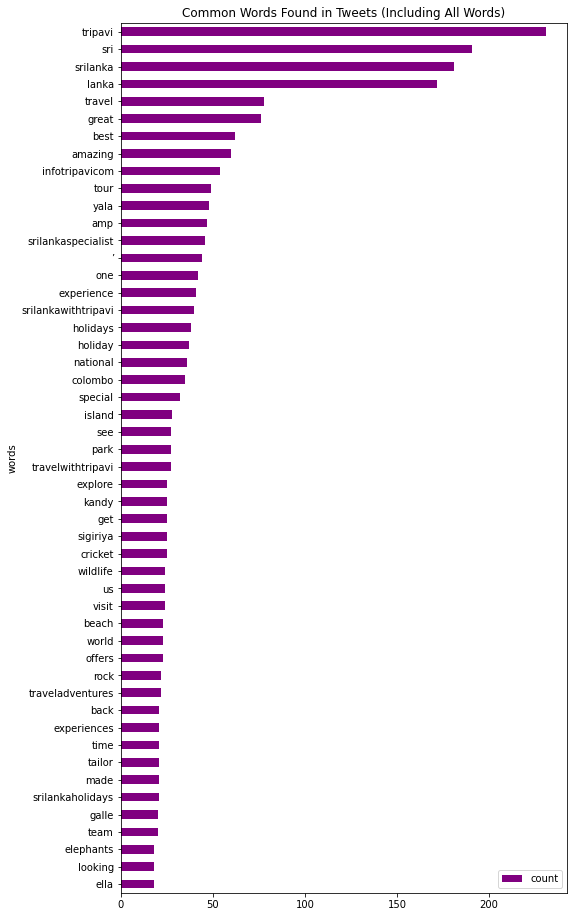

In [ ]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [ ]:
bigramsList = list(nltk.bigrams(filtered_sentence))
countsBigrams = collections.Counter(bigramsList)
bigrams1 = pd.DataFrame(countsBigrams.most_common(50),columns=['words', 'count'])
bigrams1.head(20)

,words,count
0,"(sri, lanka)",171
1,"(srilanka, tripavi)",26
2,"(national, park)",23
3,"(tripavi, srilanka)",19
4,"(tailor, made)",18
5,"(sri, lankan)",15
6,"(inspired, ideas)",15
7,"(lanka, ’)",12
8,"(yala, national)",12
9,"(srilankaspecialist, srilankawithtripavi)",12


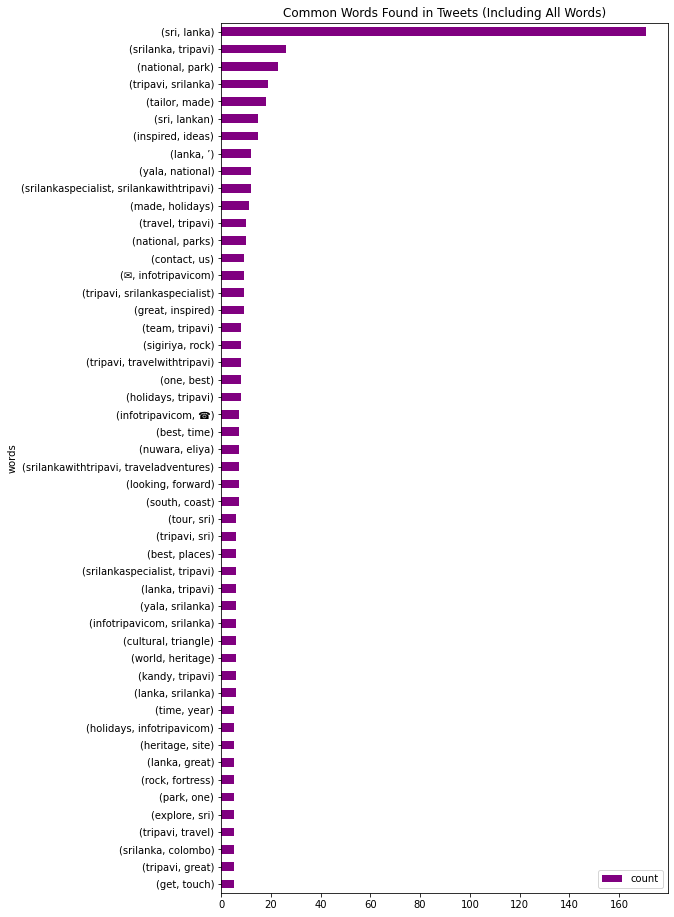

In [ ]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
bigrams1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [ ]:
trigramsList = list(nltk.trigrams(filtered_sentence))
countsTrigrams = collections.Counter(trigramsList)
countsTrigrams
trigrams1 = pd.DataFrame(countsTrigrams.most_common(50),
                             columns=['words', 'count'])
trigrams1.head(20)

,words,count
0,"(sri, lanka, ’)",12
1,"(yala, national, park)",11
2,"(tailor, made, holidays)",11
3,"(great, inspired, ideas)",9
4,"(sri, lanka, srilanka)",6
5,"(sri, lanka, tripavi)",6
6,"(tour, sri, lanka)",6
7,"(explore, sri, lanka)",5
8,"(sigiriya, rock, fortress)",5
9,"(sri, lanka, great)",5


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9937 missing from current font.
  font.set_text(s, 0, flags=flags)


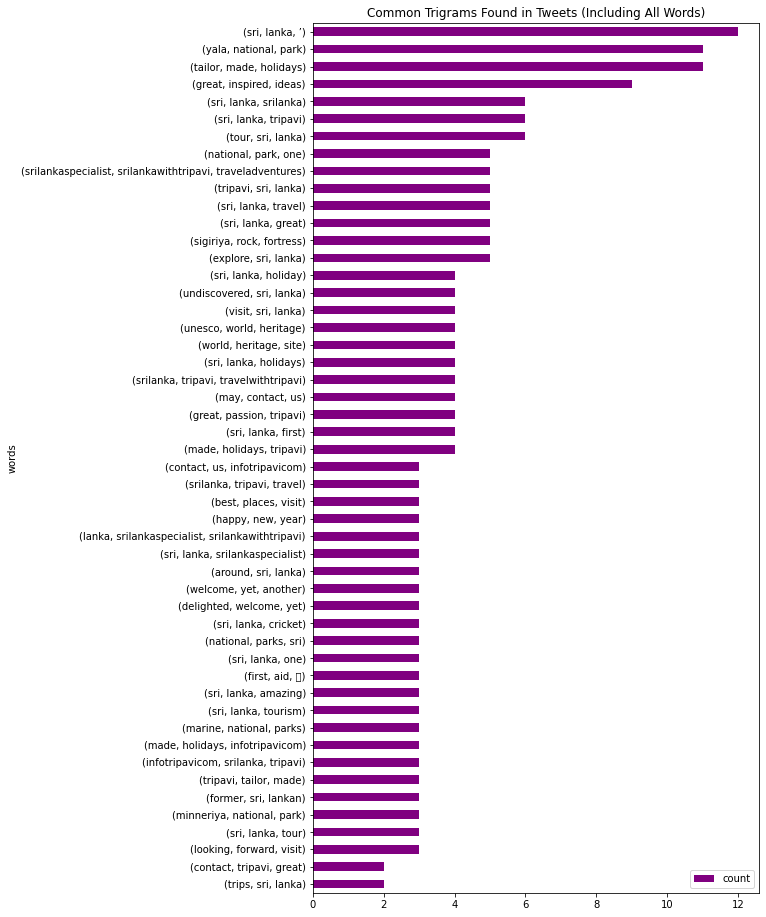

In [ ]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
trigrams1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Trigrams Found in Tweets (Including All Words)")
plt.show()

In [ ]:
# Filtering corpus, this time with stemmer (better for the cluster algorithm)
corpus = []
for i in range(0, len(df)):
    tweet = df['text'][i]
    tweet = tweet.lower()
    tweet = tweet.replace(',', '').replace('.', '').replace('-', '').replace('!', '').replace(';', '')
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet]
    loopVar = []
    for i in tweet:
        if i not in stop_words:
            loopVar.append(i)
    loopVar = ' '.join(loopVar)
    corpus.append(loopVar)

In [ ]:
# Creating Bag of Words for clustering
cv = CountVectorizer(max_features = 20000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
true_k = 15 # set number of clusters as wished
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 peopl
 strong
 seek
 mountain
 soul
 proven
 beauti
 beautifulsrilanka
 hospit
 pain
Cluster 1:
 holiday
 cfieldwchoic
 present
 product
 staceylouwil
 love
 get
 germani
 georgiadavi
 georgia
Cluster 2:
 tourism
 hotel
 wa
 summit
 thi
 honor
 happen
 lanka
 help
 industri
Cluster 3:
 yala
 park
 nation
 tripavi
 srilanka
 eleph
 wild
 wildlif
 traveladventur
 best
Cluster 4:
 sri
 lanka
 tripavi
 srilanka
 travel
 tour
 infotripavicom
 great
 holiday
 experi
Cluster 5:
 gall
 srilanka
 tripavi
 best
 tour
 fort
 resort
 look
 amp
 day
Cluster 6:
 tripavi
 srilanka
 travel
 great
 holiday
 thi
 amaz
 experi
 best
 colombo
Cluster 7:
 escap
 lanka
 bounti
 hill
 paradis
 everyth
 got
 unexploit
 want
 may
Cluster 8:
 bungalow
 extens
 luxuri
 plantat
 bedroom
 theme
 five
 hill
 ago
 infin
Cluster 9:
 farm
 wind
 ambewela
 stayhom
 travel
 smaller
 dismantl
 hill
 windfarm
 wa
Cluster 10:
 nation
 park
 sri
 marin
 lanka
 snorkel
 pigeon
 coral
 reef


In [ ]:
labels = model.predict(X)
labels

array([ 6,  4,  4,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  4,  4,  4,  6,
        6,  6,  6,  6,  6,  6,  6,  3,  6,  3,  6,  4,  6,  6,  6,  4,  4,
        5, 14,  6,  6,  6,  4,  5,  6,  4,  4,  6,  4,  6,  6,  4,  6,  4,
        4,  4,  4,  6,  6,  4,  4,  6,  4,  6,  6,  6,  6, 10,  4,  4, 10,
        6,  6,  3,  6,  6,  6,  4,  4,  4,  6,  6,  4,  6,  4,  4,  6,  6,
        4,  6,  4,  4,  6,  4,  6,  4,  6,  4,  6,  6,  6,  6,  4,  4,  6,
        4,  4,  6,  6,  6,  6,  6,  6,  4,  6,  6,  3,  9,  6,  4,  4,  6,
        6,  6,  6,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6,  4,  6,  6,
        4,  6,  6,  4,  6,  6,  4,  6,  6,  6,  6,  4,  6,  6,  6,  4,  6,
        6,  4,  6,  6,  0,  6,  6,  6,  6,  6,  6,  4,  4,  6,  6,  4,  4,
        4, 10,  5,  4,  6,  6,  6,  4,  6,  4,  6,  6,  6,  6,  6,  6,  6,
        6,  4,  4,  4,  6,  4,  6,  4,  6,  6,  6,  5,  6,  6,  3,  6,  6,
        4,  6,  6,  3,  4,  6,  6,  4,  3,  6,  6,  6,  4,  6,  4,  4,  6,
        6,  5,  6,  4,  6

In [ ]:
clusteredTweets = pd.DataFrame(df.text)
clusteredTweets["cluster"] = pd.DataFrame(labels)

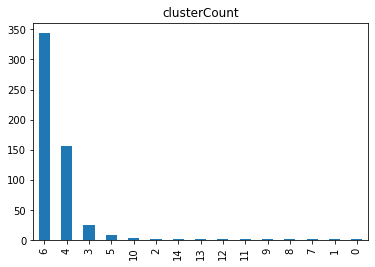

In [ ]:
clusteredTweets.cluster.value_counts().plot(kind = 'bar', title = 'clusterCount')

In [ ]:
# Getting the most representative tweet of each cluster
closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, X)

In [ ]:
# Showing most representative tweet for each cluster and comparing to negative reason column
mostReprTweets = clusteredTweets.iloc[closest]
#mostReprTweets["negativereason"] = dataset.negativereason[closest]
mostReprTweets

,text,cluster
157,sri lanka the little spice packed thrill seek...,0
469,cfieldwchoice staceylouwil lovely presentation...,1
413,international tourism leaders summit and tour...,2
12,,6
348,sri lanka holidays with tripavi,4
318,☀️srilanka,6
12,,6
364,a little bit of paradise bounties with unique...,7
403,taylor ’ s hill is a stone tea plantation bung...,8
114,did you know sri lanka had wind farms our mos...,9
